In [1]:
!pip install hiddenlayer

In [2]:
import torch
import torch.nn as nn
import hiddenlayer as hl

In [3]:
import torch
from torch import nn
class SEB_block(nn.Module):
    def __init__(self, nin, nout, kernel_size, padding, bias=True):
        super(SEB_block, self).__init__()
        self.PC1 = nn.Conv2d(nin, nin, kernel_size=kernel_size, padding=padding, groups=nin, bias=bias)
        self.PC2 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.PC3 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC4 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.PPC1 = nn.PReLU()
        self.PPC2 = nn.PReLU()
        #EXPAND STAGE
        self.PC5 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC5 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC6 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC6 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC7 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC7 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC8 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC8 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC9 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC9 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC10 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC10 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC11 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC11 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)
        self.PC12 = nn.Conv2d(nin, nout, kernel_size=1, bias=bias)
        self.DWC12 = nn.Conv2d(nout, nin, kernel_size=1, bias=bias)


    def forward(self, c):
        PC1 = self.PC1(c)
        PC2 = self.PC2(c)
        PC3 = self.PC3(c)
        PC4 = self.PC4(c)
        sum1 = torch.sum(torch.stack([PC1,PC2,PC3,PC4]), dim=0)
        PPC1 = self.PPC1(sum1)
        
        PC5 = self.PC5(PPC1)
        DWC5 = self.DWC5(PC5)
        
        PC6 = self.PC6(PPC1)
        DWC6 = self.DWC6(PC6)
        
        PC7 = self.PC7(PPC1)
        DWC7 = self.DWC7(PC7)
        
        PC8 = self.PC8(PPC1)
        DWC8 = self.DWC8(PC8)
        
        PC9 = self.PC9(PPC1)
        DWC9 = self.DWC9(PC9)
        
        PC10 = self.PC10(PPC1)
        DWC10 = self.DWC10(PC10)
        
        PC11 = self.PC11(PPC1)
        DWC11 = self.DWC11(PC11)
        
        PC12 = self.PC12(PPC1)
        DWC12 = self.DWC12(PC12)
        
        sum2 = torch.sum(torch.stack([DWC5,DWC6,DWC7,DWC8,DWC9,DWC10,DWC11,DWC12]), dim=0)
        PPC2 = self.PPC2(sum2)
        return PPC2
                              
class SENext(nn.Module):
    def __init__(self, d=32,num_channels=1):
        super(SENext, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=3 // 2,bias=True) #FIRST FEATURE EXTRACTION LAYER
        self.prelu1 = nn.PReLU()

        ###FIRST BLOCK
        self.conv2 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu2 = nn.PReLU()
        
        #SECOND BLOCK
        self.conv3 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu3 = nn.PReLU()
        
        #THIRD BLOCK
        self.conv4 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu4 = nn.PReLU()

        #FOURTH BLOCK
        self.conv5 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu5 = nn.PReLU()

        #FIFTH BLOCK
        self.conv5a = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu5a = nn.PReLU()



        #SHRINKING LAYER
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu6 = nn.PReLU()

        
        #DECONVOLUTION LAYER
        self.convt = nn.ConvTranspose2d(64,1, 3, padding=1)
        
        #EXPANDING LAYER 
        self.conv7 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu7 = nn.PReLU()

        #XCEPTION BLOCK 1
        self.conv8 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu8 = nn.PReLU()
        self.conv9 = SEB_block(64, 64, kernel_size=5, padding=5 // 2,bias=True)
        self.prelu9 = nn.PReLU()
        self.conv10 = SEB_block(64, 64, kernel_size=7, padding=7 // 2,bias=True)
        self.prelu10 = nn.PReLU()

        #LAYER-AFTER XCEPTION BLOCK 1
        self.conv11 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu11 = nn.PReLU()

        #XCEPTION BLOCK 2
        self.conv12 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu12 = nn.PReLU()
        self.conv13 = SEB_block(64, 64, kernel_size=5, padding=5 // 2,bias=True)
        self.prelu13 = nn.PReLU()
        self.conv14 = SEB_block(64, 64, kernel_size=7, padding=7 // 2,bias=True)
        self.prelu14 = nn.PReLU()

        #LAYER-AFTER XCEPTION BLOCK 2
        self.conv15 = nn.Conv2d(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu15 = nn.PReLU()

        #XCEPTION BLOCK 3
        self.conv16 = SEB_block(64, 64, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu16 = nn.PReLU()
        self.conv17 = SEB_block(64, 64, kernel_size=5, padding=5 // 2,bias=True)
        self.prelu17 = nn.PReLU()
        self.conv18 = SEB_block(64, 64, kernel_size=7, padding=7 // 2,bias=True)
        self.prelu18 = nn.PReLU()

        #LAYER-AFTER XCEPTION BLOCK 3
        self.conv19 = nn.Conv2d(64, 1, kernel_size=3, padding=3 // 2,bias=True)
        self.prelu19 = nn.PReLU()
        
        

    def forward(self, c):
        c1 = self.conv1(c)
        p1 = self.prelu1(c1)
        
        #FIRST BLOCK
        c2 = self.conv2(p1)
        p2 = self.prelu2(c2)

        #SECOND BLOCK
        c3 = self.conv3(p2)
        p3 = self.prelu3(c3)
   
        #THIRD BLOCK
        c4 = self.conv4(p3)
        p4 = self.prelu4(c4)

        #FOURTH BLOCK
        c5 = self.conv5(p4)
        p5 = self.prelu5(c5)
      
        #FIFTH BLOCK
        c6 = self.conv5a(p5)
        p6 = self.prelu5(c6)
    
        SumF = torch.sum(torch.stack([p1,p2,p3,p4,p5,p6]), dim=0)

        #SHRINKING LAYER
        c7 = self.conv6(SumF)
        p7 = self.prelu6(c7)

        #EXPANDING LAYER 
        c8 = self.conv7(p7)
        p8 = self.prelu7(c8)
        
        #XCEPTION BLOCK 1
        #x1 = self.conv8(p7)
        #xp1 = self.prelu7(x1)
        #x2 = self.conv9(p7)
        #xp2 = self.prelu7(x2)
        #x3 = self.conv10(p7)
        #xp3 = self.prelu7(x3)
        #C = self.prelu8(self.prelu9(self.prelu10(xp3)))

        #LAYER-AFTER XCEPTION BLOCK 1
        #c11 = self.conv11(C)
        #p11 = self.prelu1(c11)

        #XCEPTION BLOCK 2
        #x4 = self.conv12(p11)
        #xp4 = self.prelu12(x4)
        #x5 = self.conv13(p11)
        #xp5 = self.prelu12(x5)
        #x6 = self.conv14(p11)
        #xp6 = self.prelu12(x6)
        #D = self.prelu12(self.prelu13(self.prelu14(xp6)))
        
        #LAYER-AFTER XCEPTION BLOCK 2
        #c15 = self.conv15(D)
        #p15 = self.prelu15(c15)
        
        #XCEPTION BLOCK 3
        #x7 = self.conv16(p15)
        #xp7 = self.prelu15(x7)
        #x8 = self.conv17(p15)
        #xp8 = self.prelu15(x8)
        #x9 = self.conv18(p15)
        #xp9 = self.prelu15(x9)
        #E = self.prelu6(self.prelu17(self.prelu18(xp9)))

        #LAYER-AFTER XCEPTION BLOCK 3
        #c16 = self.conv19(E)
        #p16 = self.convt(p7) ######################################
        p16 = nn.PixelShuffle(1)(p8)
        p17 = self.conv7(p16)
        p18 = self.conv7(p17)
        p19 = self.conv7(p18)
        p20 = self.prelu7(p19)
        return p20

In [5]:
model = SENext()
print(model)

SENext(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (prelu1): PReLU(num_parameters=1)
  (conv2): SEB_block(
    (PC1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64)
    (PC2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PC3): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PC4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PPC1): PReLU(num_parameters=1)
    (PPC2): PReLU(num_parameters=1)
    (PC5): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (DWC5): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PC6): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (DWC6): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PC7): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (DWC7): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PC8): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (DWC8): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (PC9): Conv2d(64, 6

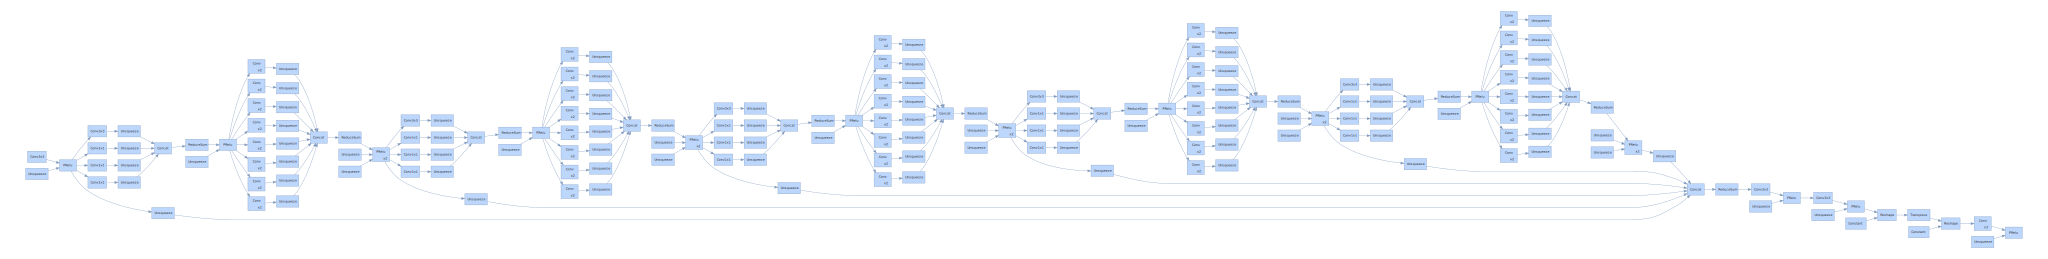

In [6]:
hl_graph = hl.build_graph(model, torch.zeros([1, 1, 26,26]))
hl_graph.theme = hl.graph.THEMES["blue"].copy()  
hl_graph


In [7]:
hl_graph.save(path='./wazir')


In [8]:
#THIS COMMAND IS USED TO DOWNLOAD TRAINED MODEL
from google.colab import files
files.download('wazir.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>